In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

50.806716111279655 -34.21298121685439
76.79987222453252 -71.96243825750479
8.169431782768697 162.41153749403753
25.974438194724186 -70.20966586371173
59.33930806153327 -160.5056498245643
87.25694896299368 105.31644738742017
41.82304746028575 -16.546895360845838
-28.08057735745799 157.04196688160653
38.65390997267494 -112.71592160130412
-2.7095680380441394 82.92770187362242
-44.98820761616632 158.79554055715965
-74.1608952652535 -52.20905652014599
39.22636765575004 144.69553705959635
86.56838540852752 -104.79327287556613
78.52285528522165 -103.27865383761787
-35.20898165975762 125.81182096347226
54.92293080249078 -43.43184880072957
5.22179758876365 40.327454347185835
-45.22749299607293 117.21999868719371
-66.53505490889046 -86.09721994583296
86.58154701440924 -172.17905571580945
8.837430409422282 151.43519229091862
-84.03374111982967 -59.02899337964615
-48.29887636287707 -27.121340296707274
-1.744892289140168 -133.96683590014177
-52.795672052579036 83.59662964563427
42.345789060578284 -

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [9]:
# Import libraries
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=24ef98ef38a80c7d9107b21ddbb4bff7


In [11]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | tofol
Processing Record 4 of Set 1 | abraham's bay
City not found. Skipping...
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | fisterra
Processing Record 8 of Set 1 | kingscliff
Processing Record 9 of Set 1 | richfield
Processing Record 10 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | yamada
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | kibre mengist
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | weno
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | grytviken
Processing Rec

Processing Record 42 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 43 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 44 of Set 4 | alcaniz
Processing Record 45 of Set 4 | perya
City not found. Skipping...
Processing Record 46 of Set 4 | biltine
Processing Record 47 of Set 4 | thanh hoa
Processing Record 48 of Set 4 | eyl
Processing Record 49 of Set 4 | port alfred
Processing Record 50 of Set 4 | basco
Processing Record 1 of Set 5 | cherdyn'
Processing Record 2 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | kavalerovo
Processing Record 5 of Set 5 | angaur state
Processing Record 6 of Set 5 | tanrake village
City not found. Skipping...
Processing Record 7 of Set 5 | acqui terme
Processing Record 8 of Set 5 | paradip garh
Processing Record 9 of Set 5 | knyaze-volkonskoye
Processing Record 10 of Set 5 | viqueque
Processing Record 11 of Set 5 | carnot
Processing R

Processing Record 32 of Set 8 | inari
Processing Record 33 of Set 8 | olyokminsk
Processing Record 34 of Set 8 | chakulia
Processing Record 35 of Set 8 | gorgan
Processing Record 36 of Set 8 | haimen
Processing Record 37 of Set 8 | port isabel
Processing Record 38 of Set 8 | baglung
Processing Record 39 of Set 8 | mahina
Processing Record 40 of Set 8 | drouin
Processing Record 41 of Set 8 | xilin hot
Processing Record 42 of Set 8 | chippewa falls
Processing Record 43 of Set 8 | nafada
Processing Record 44 of Set 8 | fernie
Processing Record 45 of Set 8 | tura
Processing Record 46 of Set 8 | tauranga
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | honefoss
Processing Record 49 of Set 8 | ta`u
Processing Record 50 of Set 8 | gagliano del capo
Processing Record 1 of Set 9 | aral
Processing Record 2 of Set 9 | santa ana
Processing Record 3 of Set 9 | island harbour
Processing Record 4 of Set 9 | conduaga
Processing Record 5 of Set 9 | cidade velha
Processing Record 

City not found. Skipping...
Processing Record 22 of Set 12 | wuyang
Processing Record 23 of Set 12 | selfoss
Processing Record 24 of Set 12 | dapa
Processing Record 25 of Set 12 | molchanovo
Processing Record 26 of Set 12 | pitimbu
Processing Record 27 of Set 12 | chateaubriant
Processing Record 28 of Set 12 | timmins
Processing Record 29 of Set 12 | nova vicosa
Processing Record 30 of Set 12 | machico
Processing Record 31 of Set 12 | huarmey
Processing Record 32 of Set 12 | suleja
Processing Record 33 of Set 12 | guiyang
Processing Record 34 of Set 12 | el calafate
Processing Record 35 of Set 12 | rongelap
Processing Record 36 of Set 12 | mogocha
Processing Record 37 of Set 12 | sadao
Processing Record 38 of Set 12 | san luis
Processing Record 39 of Set 12 | kuanda
Processing Record 40 of Set 12 | witu
Processing Record 41 of Set 12 | tanaina
Processing Record 42 of Set 12 | bibiani
Processing Record 43 of Set 12 | port douglas
Processing Record 44 of Set 12 | indore
Processing Record

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,68.40,68,20,14.97,PT,2023-05-30 19:28:23
1,Iqaluit,63.7506,-68.5145,33.53,100,100,6.91,CA,2023-05-30 19:28:23
2,Tofol,5.3248,163.0078,82.76,74,61,6.46,FM,2023-05-30 19:28:23
3,Bethel,41.3712,-73.4140,75.18,45,0,4.61,US,2023-05-30 19:28:24
4,Udachny,66.4167,112.4000,32.45,74,64,14.67,RU,2023-05-30 19:28:24
5,Fisterra,42.9049,-9.2629,63.75,89,98,4.68,ES,2023-05-30 19:28:24
6,Kingscliff,-28.2667,153.5667,42.60,93,8,0.00,AU,2023-05-30 19:28:24
7,Richfield,44.8833,-93.2830,87.42,51,75,18.41,US,2023-05-30 19:28:25
8,Invercargill,-46.4000,168.3500,47.89,83,100,11.36,NZ,2023-05-30 19:28:25
9,Stanley,54.8680,-1.6985,53.78,80,20,6.91,GB,2023-05-30 19:28:25


In [16]:
rr_city_data_df=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
new_city_data=city_data_df[rr_city_data_df]
new_city_data.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2023-05-30 19:28:23,38.5167,-28.7000,68.40,68,20,14.97
1,Iqaluit,CA,2023-05-30 19:28:23,63.7506,-68.5145,33.53,100,100,6.91
2,Tofol,FM,2023-05-30 19:28:23,5.3248,163.0078,82.76,74,61,6.46
3,Bethel,US,2023-05-30 19:28:24,41.3712,-73.4140,75.18,45,0,4.61
4,Udachny,RU,2023-05-30 19:28:24,66.4167,112.4000,32.45,74,64,14.67
5,Fisterra,ES,2023-05-30 19:28:24,42.9049,-9.2629,63.75,89,98,4.68
6,Kingscliff,AU,2023-05-30 19:28:24,-28.2667,153.5667,42.60,93,8,0.00
7,Richfield,US,2023-05-30 19:28:25,44.8833,-93.2830,87.42,51,75,18.41
8,Invercargill,NZ,2023-05-30 19:28:25,-46.4000,168.3500,47.89,83,100,11.36
9,Stanley,GB,2023-05-30 19:28:25,54.8680,-1.6985,53.78,80,20,6.91


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

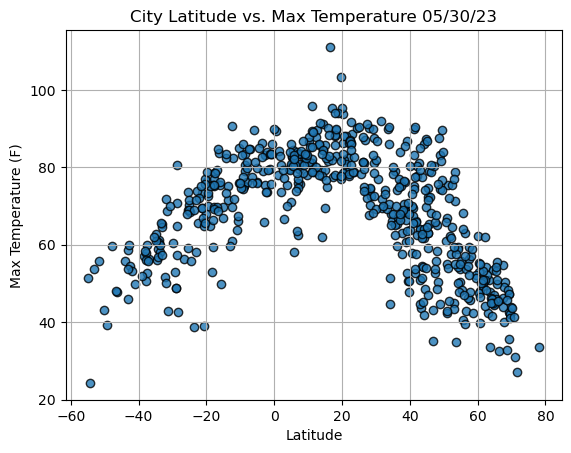

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

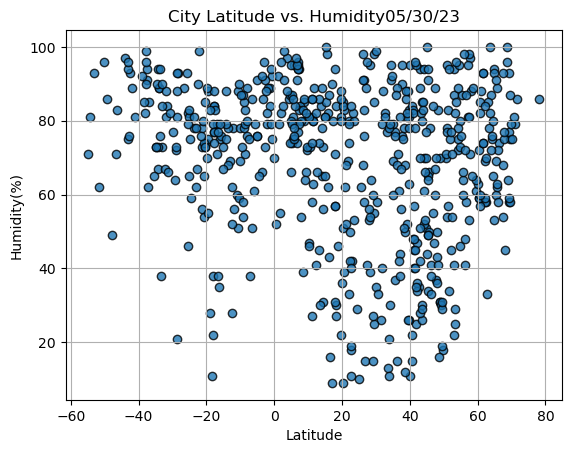

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

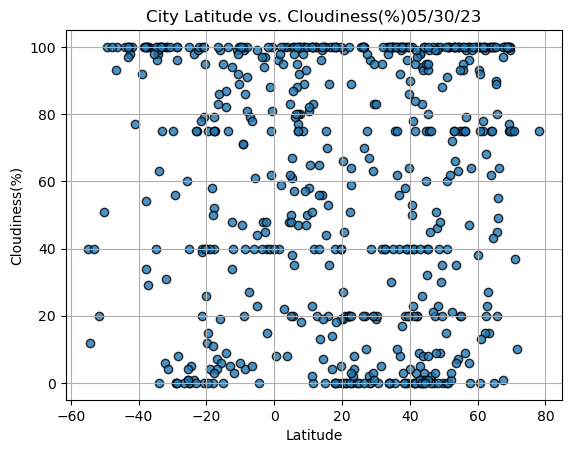

In [24]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%)"+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

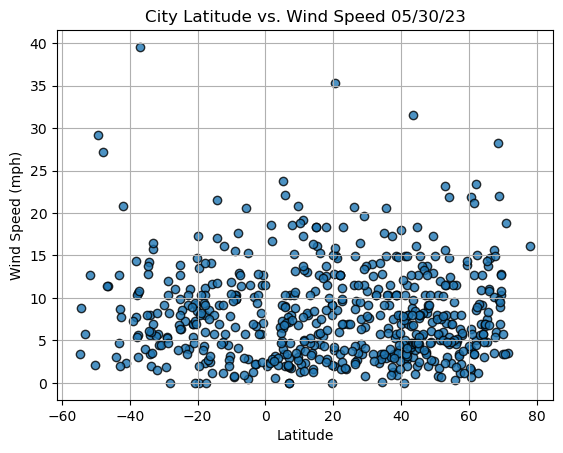

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()